In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [4]:
os.chdir('C:/Users/Mayin\Documents/1GRADUATE/1. Study/2. 24Spring/5224 Bayesian Statistics/5224_Project/Bayesian-Statistics-Project/')
data = pd.read_csv('student-por.csv')

In [5]:
# data wrangling: add sum of G1, G2, G3
data['sum'] = data[['G1', 'G2', 'G2']].sum(axis=1)

In [7]:
data.to_csv('stu_dat.csv')

In [ ]:
# Data Discritization
summary = data.describe()
summary

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,sum
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009,34.539291
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656,8.316766
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,29.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000,34.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,40.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,56.000000


Text(0.5, 1.0, 'Distribution of sum of grade sum')

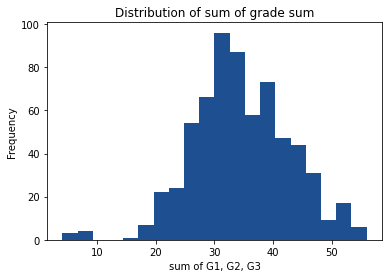

In [ ]:
# Exploration Data Analysis
# # plot: Distribuhion of sum
plt.hist(data['sum'], bins=20, color=(29/255, 79/255, 145/255))
plt.xlabel('Sum of score')
plt.ylabel('Frequency')
plt.title('Distribution of sum of grade')

c:\Users\Mayin\Downloads\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Mayin\Downloads\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 16.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


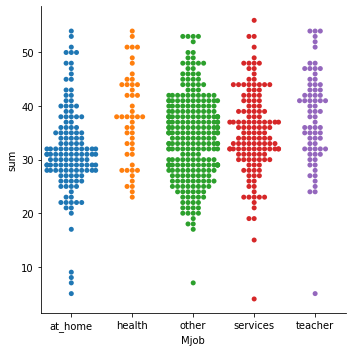

In [ ]:
# Plot: Mjob vs sum
sns.catplot(x='Mjob', y='sum', data=data, kind='swarm')
plt.title('Mjob vs sum of G1, G2, G3')
plt.show()

c:\Users\Mayin\Downloads\python\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


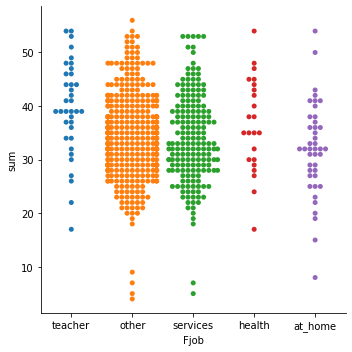

In [ ]:
# Plot: Fjob vs sum
sns.catplot(x='Fjob', y='sum', data=data, kind='swarm')
plt.title('Fjob vs sum')
plt.show()

In [ ]:
# Pivot study: ANOVA

# 拟合线性模型
model = ols('sum ~ C(Mjob)+ C(Fjob)', data=data).fit()

# 进行ANOVA测试
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                sum_sq     df         F    PR(>F)
C(Mjob)    1679.350091    4.0  6.435060  0.000044
C(Fjob)     717.352815    4.0  2.748806  0.027491
Residual  41755.015498  640.0       NaN       NaN
